In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Sub_Division_IMD_2017.csv")
type(df)

pandas.core.frame.DataFrame

In [8]:
#Data Information
print(df.info(),"\n")
print("\n")

#Data Columns
print(df.columns)
print("\n")

#Finding Missing Values
print(df.isna().sum())
print("\n")

#Filling Missing Values With Column Mean
df.fillna(df.mean(numeric_only=True),inplace=True)
print("Missing Values Were Filled With Column Mean")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [9]:
# List Of Redundant Seasonal Columns
red_cols = ['JF', 'MAM', 'JJAS', 'OND']

#Dropping These Columns From DataFrame
df = df.drop(red_cols, axis=1)
print("Removed redundant seasonal total columns: 'JF', 'MAM', 'JJAS', 'OND'\n")
print("Updated Columns:",df.columns)

Removed redundant seasonal total columns: 'JF', 'MAM', 'JJAS', 'OND'

Updated Columns: Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')


In [6]:
#Descriptive Analysis
print("Descriptive Statistics:")
print(df.describe().round(2))
print("\n")

#Unique Subdivisions
print("Unique Subdivisions (Regions):")
print(df['SUBDIVISION'].unique())
print("\n")

Descriptive Statistics:
          YEAR      JAN      FEB      MAR      APR      MAY      JUN      JUL  \
count  4188.00  4184.00  4185.00  4182.00  4184.00  4185.00  4183.00  4181.00   
mean   1959.22    18.94    21.60    27.41    43.07    85.66   230.12   347.02   
std      33.72    33.79    35.73    46.93    68.15   122.70   234.29   268.85   
min    1901.00     0.00     0.00     0.00     0.00     0.00     0.40     0.00   
25%    1930.00     0.60     0.50     1.00     3.00     8.60    70.80   175.60   
50%    1959.00     5.95     6.50     7.90    15.45    36.90   138.80   285.00   
75%    1988.00    22.00    26.60    31.38    49.65    97.80   305.00   418.50   
max    2017.00   583.70   403.50   605.60   595.10  1168.60  1609.90  2362.80   

           AUG      SEP      OCT      NOV      DEC   ANNUAL       JF      MAM  \
count  4184.00  4182.00  4181.00  4177.00  4178.00  4162.00  4182.00  4179.00   
mean    289.74   197.32    95.32    39.50    18.97  1409.45    40.52   155.82   
std

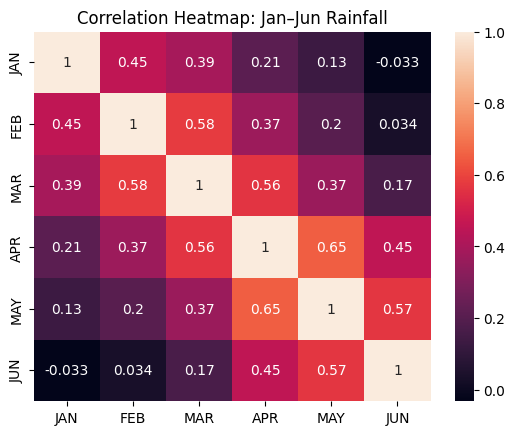

In [5]:
heatmap_data = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']]
sns.heatmap(heatmap_data.corr(), annot=True)
plt.title("Correlation Heatmap: Jan–Jun Rainfall")
plt.show()


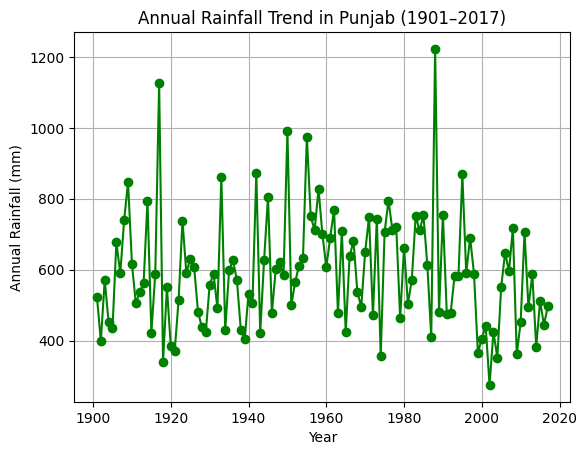

In [10]:
#Filtering Data For 'Punjab' And Plotting Rainfall Trend Across Years
punjab_data = df[df['SUBDIVISION'] == 'Punjab']
plt.plot(punjab_data['YEAR'], punjab_data['ANNUAL'], marker='o', color='green')
plt.title("Annual Rainfall Trend in Punjab (1901–2017)")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.grid(True)
plt.show()

Average Monthly Rainfall Across All Regions:
JAN     18.94
FEB     21.60
MAR     27.41
APR     43.07
MAY     85.66
JUN    230.12
JUL    347.02
AUG    289.74
SEP    197.32
OCT     95.32
NOV     39.50
DEC     18.97
dtype: float64




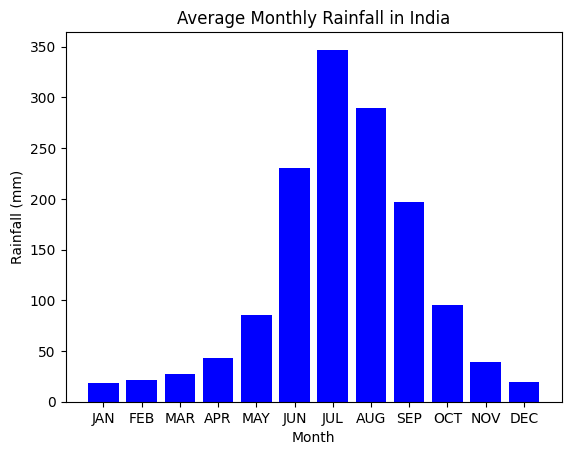

In [174]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = df[months].mean()
print("Average Monthly Rainfall Across All Regions:")
print(monthly_avg.round(2))
print("\n")

#Bar plot of monthly averages
plt.bar(months,monthly_avg,color='blue')
plt.title("Average Monthly Rainfall in India")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()